## обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist

In [16]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, Input, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Convolution2D

import tensorflow.keras as keras
from tensorflow.keras.models import Model 

import matplotlib.pyplot as plt

In [17]:
# заготовка для проверки гипотез

def model_run(input_, out_, epochs_=50, batch_size_=512,verbose_=1):
    
    model = Model(inputs = input_, outputs = out_) 
    
    model.compile(
        optimizer='adam',
        loss=keras.losses.categorical_crossentropy, 
        metrics=["accuracy"])
    
    hist = model.fit(
        x=x_train,
        y=y_train, 
        epochs=epochs_, 
        batch_size=batch_size_, 
        validation_data=(x_test, y_test), 
        verbose=verbose_)    
    
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['accuracy'])

    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('точность сети от эпох')
    plt.show()

    test_score = model.evaluate(x_test, y_test)
    print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

    return test_score[1] * 100

In [3]:
# загрузка и подготовка данных

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

4423680/4422102 [==============================] - 0s 0us/step


Epoch 1/50
118/118 [==============================] - 4s 5ms/step - loss: 0.5655 - accuracy: 0.8049 - val_loss: 0.4726 - val_accuracy: 0.8328
Epoch 2/50
118/118 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8607 - val_loss: 0.4065 - val_accuracy: 0.8573
Epoch 3/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.8743 - val_loss: 0.3779 - val_accuracy: 0.8644
Epoch 4/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8823 - val_loss: 0.3964 - val_accuracy: 0.8579
Epoch 5/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.8876 - val_loss: 0.3573 - val_accuracy: 0.8719
Epoch 6/50
118/118 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.8934 - val_loss: 0.3397 - val_accuracy: 0.8781
Epoch 7/50
118/118 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.9009 - val_loss: 0.3431 - val_accuracy: 0.8763
Epoch 

No handles with labels found to put in legend.


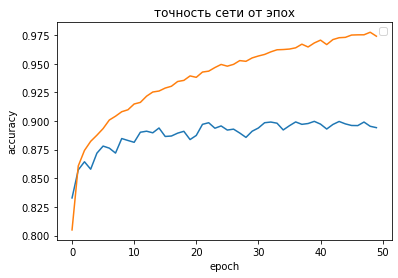

313/313 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8942
Test loss 0.3967, accuracy 89.42%


89.42000269889832

In [4]:
# полносвязная сеть

input1= layers.Input(shape=(28,28,1))

x = layers.Flatten()(input1)
x = layers.Dense(1024, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()
model_run(input1, out_x)

Epoch 1/50
118/118 [==============================] - 46s 120ms/step - loss: 0.8828 - accuracy: 0.6592 - val_loss: 0.5162 - val_accuracy: 0.8018
Epoch 2/50
118/118 [==============================] - 13s 107ms/step - loss: 0.3911 - accuracy: 0.8537 - val_loss: 0.4508 - val_accuracy: 0.8318
Epoch 3/50
118/118 [==============================] - 12s 103ms/step - loss: 0.3113 - accuracy: 0.8820 - val_loss: 0.3243 - val_accuracy: 0.8776
Epoch 4/50
118/118 [==============================] - 12s 101ms/step - loss: 0.2659 - accuracy: 0.9003 - val_loss: 0.2851 - val_accuracy: 0.8936
Epoch 5/50
118/118 [==============================] - 12s 100ms/step - loss: 0.2452 - accuracy: 0.9083 - val_loss: 0.2820 - val_accuracy: 0.9014
Epoch 6/50
118/118 [==============================] - 12s 100ms/step - loss: 0.2259 - accuracy: 0.9151 - val_loss: 0.2787 - val_accuracy: 0.9013
Epoch 7/50
118/118 [==============================] - 12s 101ms/step - loss: 0.2081 - accuracy: 0.9225 - val_loss: 0.2691 - val_ac

No handles with labels found to put in legend.


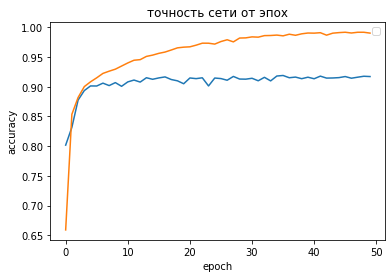

313/313 [==============================] - 2s 5ms/step - loss: 0.5107 - accuracy: 0.9172
Test loss 0.5107, accuracy 91.72%


91.72000288963318

In [5]:
# сеть AlexNet

input1= layers.Input(shape=(28,28,1))

x = layers.Conv2D(64, kernel_size=(11, 11), strides=(1, 1), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(192, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()
model_run(input1, out_x)

Epoch 1/50
118/118 [==============================] - 30s 198ms/step - loss: 0.9644 - accuracy: 0.6222 - val_loss: 0.4954 - val_accuracy: 0.8138
Epoch 2/50
118/118 [==============================] - 20s 171ms/step - loss: 0.3856 - accuracy: 0.8555 - val_loss: 0.3638 - val_accuracy: 0.8566
Epoch 3/50
118/118 [==============================] - 20s 171ms/step - loss: 0.3191 - accuracy: 0.8795 - val_loss: 0.3211 - val_accuracy: 0.8804
Epoch 4/50
118/118 [==============================] - 20s 171ms/step - loss: 0.2750 - accuracy: 0.8962 - val_loss: 0.3134 - val_accuracy: 0.8848
Epoch 5/50
118/118 [==============================] - 20s 170ms/step - loss: 0.2477 - accuracy: 0.9063 - val_loss: 0.2994 - val_accuracy: 0.8948
Epoch 6/50
118/118 [==============================] - 20s 171ms/step - loss: 0.2285 - accuracy: 0.9125 - val_loss: 0.2633 - val_accuracy: 0.9039
Epoch 7/50
118/118 [==============================] - 20s 172ms/step - loss: 0.2100 - accuracy: 0.9212 - val_loss: 0.2585 - val_ac

No handles with labels found to put in legend.


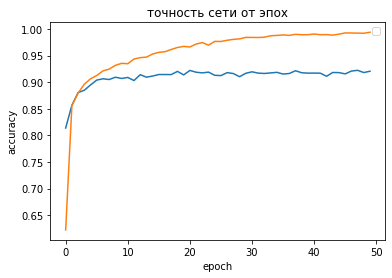

313/313 [==============================] - 2s 7ms/step - loss: 0.5064 - accuracy: 0.9206
Test loss 0.5064, accuracy 92.06%


92.05999970436096

In [6]:
# в 2 раза больше ядер

input1= layers.Input(shape=(28,28,1))

x = layers.Conv2D(128, kernel_size=(11, 11), strides=(1, 1), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(386, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(386, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

model_run(input1, out_x)

Epoch 1/50
118/118 [==============================] - 67s 437ms/step - loss: 1.1295 - accuracy: 0.5797 - val_loss: 0.6589 - val_accuracy: 0.7374
Epoch 2/50
118/118 [==============================] - 43s 364ms/step - loss: 0.4419 - accuracy: 0.8383 - val_loss: 0.4148 - val_accuracy: 0.8472
Epoch 3/50
118/118 [==============================] - 43s 364ms/step - loss: 0.3448 - accuracy: 0.8726 - val_loss: 0.3832 - val_accuracy: 0.8581
Epoch 4/50
118/118 [==============================] - 43s 364ms/step - loss: 0.3005 - accuracy: 0.8885 - val_loss: 0.3358 - val_accuracy: 0.8756
Epoch 5/50
118/118 [==============================] - 43s 364ms/step - loss: 0.2773 - accuracy: 0.8981 - val_loss: 0.3339 - val_accuracy: 0.8789
Epoch 6/50
118/118 [==============================] - 43s 363ms/step - loss: 0.2492 - accuracy: 0.9079 - val_loss: 0.3646 - val_accuracy: 0.8679
Epoch 7/50
118/118 [==============================] - 43s 364ms/step - loss: 0.2381 - accuracy: 0.9112 - val_loss: 0.2862 - val_ac

No handles with labels found to put in legend.


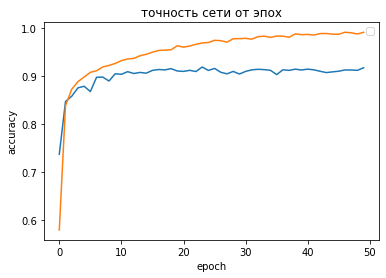

313/313 [==============================] - 5s 14ms/step - loss: 0.5727 - accuracy: 0.9175
Test loss 0.5727, accuracy 91.75%


91.75000190734863

In [7]:
# в 4 раза больше ядер

input1= layers.Input(shape=(28,28,1))

x = layers.Conv2D(256, kernel_size=(11, 11), strides=(1, 1), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(512, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

model_run(input1, out_x)

Epoch 1/50
118/118 [==============================] - 36s 277ms/step - loss: 1.2968 - accuracy: 0.4833 - val_loss: 0.6749 - val_accuracy: 0.7361
Epoch 2/50
118/118 [==============================] - 30s 257ms/step - loss: 0.4666 - accuracy: 0.8233 - val_loss: 0.4722 - val_accuracy: 0.8267
Epoch 3/50
118/118 [==============================] - 30s 255ms/step - loss: 0.3592 - accuracy: 0.8655 - val_loss: 0.3894 - val_accuracy: 0.8563
Epoch 4/50
118/118 [==============================] - 30s 257ms/step - loss: 0.3119 - accuracy: 0.8834 - val_loss: 0.3564 - val_accuracy: 0.8705
Epoch 5/50
118/118 [==============================] - 30s 256ms/step - loss: 0.2785 - accuracy: 0.8968 - val_loss: 0.3202 - val_accuracy: 0.8820
Epoch 6/50
118/118 [==============================] - 30s 256ms/step - loss: 0.2633 - accuracy: 0.9030 - val_loss: 0.3095 - val_accuracy: 0.8902
Epoch 7/50
118/118 [==============================] - 30s 256ms/step - loss: 0.2426 - accuracy: 0.9101 - val_loss: 0.2881 - val_ac

No handles with labels found to put in legend.


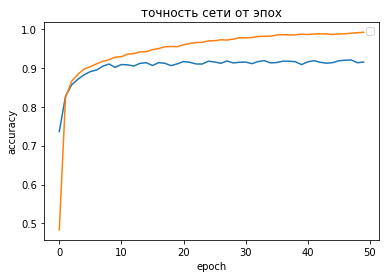

313/313 [==============================] - 3s 9ms/step - loss: 0.5163 - accuracy: 0.9148
Test loss 0.5163, accuracy 91.48%


91.47999882698059

In [8]:
# больше слоев

input1= layers.Input(shape=(28,28,1))

x = layers.Conv2D(128, kernel_size=(11, 11), strides=(1, 1), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x) # новый
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(386, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(386, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x) # новый
x = layers.Conv2D(386, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

model_run(input1, out_x)

Вывод: на датасете fashion-mnist преимущества AlexNet (и вообще сверточных сетей) не особенно заметны. Хотя результаты и улучшаются на 2-3%

# реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.datasets import cifar10
import os

# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [19]:
x_train.shape[1:]

(32, 32, 3)

Epoch 1/50
98/98 [==============================] - 1s 9ms/step - loss: 2.0400 - accuracy: 0.2776 - val_loss: 1.7878 - val_accuracy: 0.3685
Epoch 2/50
98/98 [==============================] - 1s 7ms/step - loss: 1.7407 - accuracy: 0.3807 - val_loss: 1.7010 - val_accuracy: 0.3906
Epoch 3/50
98/98 [==============================] - 1s 7ms/step - loss: 1.6523 - accuracy: 0.4107 - val_loss: 1.6053 - val_accuracy: 0.4351
Epoch 4/50
98/98 [==============================] - 1s 7ms/step - loss: 1.5835 - accuracy: 0.4359 - val_loss: 1.5622 - val_accuracy: 0.4532
Epoch 5/50
98/98 [==============================] - 1s 7ms/step - loss: 1.5367 - accuracy: 0.4563 - val_loss: 1.5312 - val_accuracy: 0.4560
Epoch 6/50
98/98 [==============================] - 1s 7ms/step - loss: 1.5005 - accuracy: 0.4672 - val_loss: 1.5119 - val_accuracy: 0.4579
Epoch 7/50
98/98 [==============================] - 1s 7ms/step - loss: 1.4641 - accuracy: 0.4796 - val_loss: 1.4813 - val_accuracy: 0.4757
Epoch 8/50
98/98 [==

No handles with labels found to put in legend.


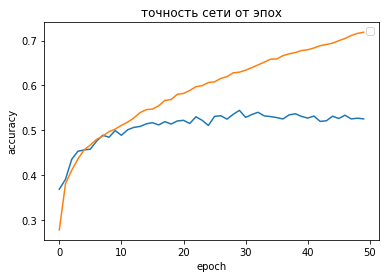

313/313 [==============================] - 1s 2ms/step - loss: 1.4631 - accuracy: 0.5254
Test loss 1.4631, accuracy 52.54%


52.539998292922974

In [21]:
# полносвязная сеть

input1 = layers.Input(shape=(32,32,3))

x = layers.Flatten()(input1)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()

model_run(input1, out_x)

Epoch 1/50
98/98 [==============================] - 3s 22ms/step - loss: 1.7658 - accuracy: 0.3860 - val_loss: 1.4214 - val_accuracy: 0.4953
Epoch 2/50
98/98 [==============================] - 2s 19ms/step - loss: 1.3370 - accuracy: 0.5336 - val_loss: 1.2725 - val_accuracy: 0.5519
Epoch 3/50
98/98 [==============================] - 2s 19ms/step - loss: 1.2017 - accuracy: 0.5812 - val_loss: 1.1894 - val_accuracy: 0.5830
Epoch 4/50
98/98 [==============================] - 2s 19ms/step - loss: 1.1268 - accuracy: 0.6082 - val_loss: 1.1419 - val_accuracy: 0.6006
Epoch 5/50
98/98 [==============================] - 2s 19ms/step - loss: 1.0666 - accuracy: 0.6299 - val_loss: 1.1450 - val_accuracy: 0.5979
Epoch 6/50
98/98 [==============================] - 2s 19ms/step - loss: 1.0131 - accuracy: 0.6479 - val_loss: 1.0731 - val_accuracy: 0.6250
Epoch 7/50
98/98 [==============================] - 2s 19ms/step - loss: 0.9648 - accuracy: 0.6680 - val_loss: 1.0597 - val_accuracy: 0.6328
Epoch 8/50
98

No handles with labels found to put in legend.


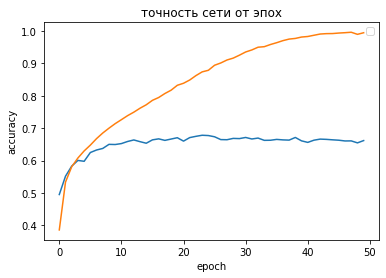

313/313 [==============================] - 1s 2ms/step - loss: 1.6567 - accuracy: 0.6619
Test loss 1.6567, accuracy 66.19%


66.1899983882904

In [11]:
# добавляем сверточный слой

input1 = layers.Input(shape=(32,32,3))

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()

model_run(input1, out_x)

Epoch 1/50
98/98 [==============================] - 3s 24ms/step - loss: 1.8125 - accuracy: 0.3445 - val_loss: 1.5159 - val_accuracy: 0.4530
Epoch 2/50
98/98 [==============================] - 2s 19ms/step - loss: 1.4305 - accuracy: 0.4848 - val_loss: 1.3623 - val_accuracy: 0.5124
Epoch 3/50
98/98 [==============================] - 2s 19ms/step - loss: 1.2848 - accuracy: 0.5427 - val_loss: 1.2417 - val_accuracy: 0.5624
Epoch 4/50
98/98 [==============================] - 2s 20ms/step - loss: 1.1950 - accuracy: 0.5770 - val_loss: 1.1693 - val_accuracy: 0.5846
Epoch 5/50
98/98 [==============================] - 2s 20ms/step - loss: 1.1179 - accuracy: 0.6057 - val_loss: 1.2160 - val_accuracy: 0.5615
Epoch 6/50
98/98 [==============================] - 2s 20ms/step - loss: 1.0564 - accuracy: 0.6277 - val_loss: 1.0766 - val_accuracy: 0.6217
Epoch 7/50
98/98 [==============================] - 2s 20ms/step - loss: 1.0104 - accuracy: 0.6470 - val_loss: 1.0297 - val_accuracy: 0.6378
Epoch 8/50
98

No handles with labels found to put in legend.


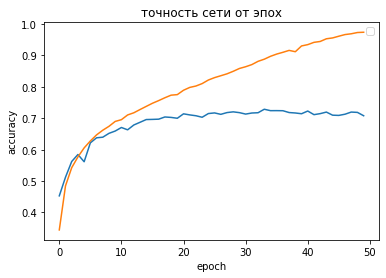

313/313 [==============================] - 1s 3ms/step - loss: 1.4406 - accuracy: 0.7080
Test loss 1.4406, accuracy 70.80%


70.80000042915344

In [12]:
# добавляем ещё сверточных слоев

input1 = layers.Input(shape=(32,32,3))

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()

model_run(input1, out_x)

Epoch 1/50
98/98 [==============================] - 16s 128ms/step - loss: 2.1634 - accuracy: 0.1790 - val_loss: 1.7714 - val_accuracy: 0.3147
Epoch 2/50
98/98 [==============================] - 10s 100ms/step - loss: 1.6083 - accuracy: 0.3928 - val_loss: 1.4242 - val_accuracy: 0.4689
Epoch 3/50
98/98 [==============================] - 10s 100ms/step - loss: 1.2990 - accuracy: 0.5219 - val_loss: 1.1692 - val_accuracy: 0.5732
Epoch 4/50
98/98 [==============================] - 10s 100ms/step - loss: 1.0800 - accuracy: 0.6096 - val_loss: 1.0288 - val_accuracy: 0.6329
Epoch 5/50
98/98 [==============================] - 10s 101ms/step - loss: 0.9306 - accuracy: 0.6656 - val_loss: 0.9543 - val_accuracy: 0.6587
Epoch 6/50
98/98 [==============================] - 10s 101ms/step - loss: 0.8195 - accuracy: 0.7074 - val_loss: 0.8775 - val_accuracy: 0.6923
Epoch 7/50
98/98 [==============================] - 10s 101ms/step - loss: 0.7239 - accuracy: 0.7437 - val_loss: 0.8556 - val_accuracy: 0.7071

No handles with labels found to put in legend.


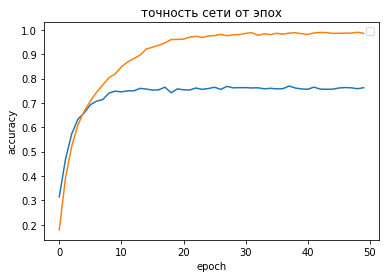

313/313 [==============================] - 2s 4ms/step - loss: 1.5336 - accuracy: 0.7623
Test loss 1.5336, accuracy 76.23%


76.23000144958496

In [13]:
# сеть AlexNet

input1 = layers.Input(shape=(32,32,3))

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  padding="same")(input1)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(192, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

out_x = layers.Dense(10, activation='softmax')(x)

# model.summary()
model_run(input1, out_x)

Вывод: Рост метрики очевидет. При подносвязной сети 52%, у AlexNet - 76%